<a href="https://colab.research.google.com/github/RuperttAryeenWind/datascience/blob/master/machine-learning/courses/linkedin_ai/day1/LRExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
%matplotlib inline

import pandas
import numpy
import scipy
import statistics
import matplotlib
import seaborn
import math

In [5]:
# load data
!pwd
d = pandas.read_csv('/content/drive/My Drive/Aravind/Education/Artificial Intelligence/data/Homes76/homes76.dat.txt', sep='\t')
d.head()


/content


,id,Y,X1,X2,X3,X4,X3X4,year,X5,X5sq,X6,status,D7,elem,D8,D9,D10,D11,D12
0,1,388.0,2.180,4,3.0,4,12.0,1940,-3.0,9.00,0,sld,0,edison,1,0,0,0,0
1,2,450.0,2.054,5,3.0,4,12.0,1957,-1.3,1.69,2,sld,0,edison,1,0,0,0,0
2,3,386.0,2.112,5,2.0,4,8.0,1955,-1.5,2.25,2,sld,0,edison,1,0,0,0,0
3,4,350.0,1.442,6,1.0,2,2.0,1956,-1.4,1.96,1,act,1,adams,0,0,1,0,0
4,5,155.5,1.800,1,2.0,4,8.0,1994,2.4,5.76,1,sld,0,adams,0,0,1,0,0


In [6]:
d.tail()

,id,Y,X1,X2,X3,X4,X3X4,year,X5,X5sq,X6,status,D7,elem,D8,D9,D10,D11,D12
71,72,249.9,2.081,5,2.1,4,8.4,1970,0.0,0.00,1,sld,0,harris,0,1,0,0,0
72,73,215.0,2.044,1,1.1,4,4.4,1936,-3.4,11.56,0,sld,0,parker,0,0,0,0,1
73,74,435.0,2.253,11,2.0,3,6.0,1979,0.9,0.81,2,sld,0,edge,0,0,0,0,0
74,75,274.9,1.861,4,2.0,4,8.0,1995,2.5,6.25,2,act,1,parker,0,0,0,0,1
75,76,349.5,2.896,4,3.0,5,15.0,1979,0.9,0.81,2,act,1,crest,0,0,0,1,0


In [7]:
# rename columns
cols = ['id', 'Price', 'Size', 'Lot', 'Bath', 'Bed', 'BathBed', 'Year', 'Age',
   'Agesq', 'Garage', 'Status', 'Active', 'Elem', 'Edison Elementary',
   'Harris Elementary', 'Adams Elementary', 'Crest Elementary', 'Parker Elementary']
cols = { d.columns.values[i]:cols[i] for i in range(len(cols))}
d.rename(index=str, columns=cols, inplace = True)
d.head()

,id,Price,Size,Lot,Bath,Bed,BathBed,Year,Age,Agesq,Garage,Status,Active,Elem,Edison Elementary,Harris Elementary,Adams Elementary,Crest Elementary,Parker Elementary
0,1,388.0,2.180,4,3.0,4,12.0,1940,-3.0,9.00,0,sld,0,edison,1,0,0,0,0
1,2,450.0,2.054,5,3.0,4,12.0,1957,-1.3,1.69,2,sld,0,edison,1,0,0,0,0
2,3,386.0,2.112,5,2.0,4,8.0,1955,-1.5,2.25,2,sld,0,edison,1,0,0,0,0
3,4,350.0,1.442,6,1.0,2,2.0,1956,-1.4,1.96,1,act,1,adams,0,0,1,0,0
4,5,155.5,1.800,1,2.0,4,8.0,1994,2.4,5.76,1,sld,0,adams,0,0,1,0,0


In [0]:
colsForCorr = ["Size", "Lot", "Bath", "Bed", "BathBed", "Year", "Age", 
              "Agesq", "Garage", "Active", "Edison Elementary", "Harris Elementary",
              "Adams Elementary", "Crest Elementary", "Parker Elementary"]
d_corrTest = d.loc[:, colsForCorr]

In [9]:
d_corrTest.corr(method='spearman') # Other methods: 'pearson', 'kendall'

,Size,Lot,Bath,Bed,BathBed,Year,Age,Agesq,Garage,Active,Edison Elementary,Harris Elementary,Adams Elementary,Crest Elementary,Parker Elementary
Size,1.000000,0.019059,0.449588,0.131973,0.384692,0.237512,0.237512,-0.040436,0.253540,-0.123224,-0.060053,0.075833,-0.194108,-0.086769,0.125110
Lot,0.019059,1.000000,-0.219307,-0.200724,-0.324631,-0.083238,-0.083238,-0.212203,0.229756,-0.008621,0.023071,-0.264439,0.067207,0.128259,0.158136
Bath,0.449588,-0.219307,1.000000,0.044245,0.730113,0.420514,0.420514,0.005716,0.236064,0.154506,-0.186093,0.291471,-0.213956,0.015216,-0.126084
Bed,0.131973,-0.200724,0.044245,1.000000,0.650806,-0.394007,-0.394007,-0.095844,-0.353755,-0.112232,0.042641,-0.212754,-0.104154,0.085238,0.153715
BathBed,0.384692,-0.324631,0.730113,0.650806,1.000000,0.055890,0.055890,-0.042594,-0.049431,0.039397,-0.097363,0.113500,-0.160510,0.037134,-0.053367
Year,0.237512,-0.083238,0.420514,-0.394007,0.055890,1.000000,1.000000,0.025848,0.560421,0.249192,-0.428925,0.388748,-0.083252,-0.025605,0.000754
Age,0.237512,-0.083238,0.420514,-0.394007,0.055890,1.000000,1.000000,0.025848,0.560421,0.249192,-0.428925,0.388748,-0.083252,-0.025605,0.000754
Agesq,-0.040436,-0.212203,0.005716,-0.095844,-0.042594,0.025848,0.025848,1.000000,-0.192455,-0.173979,0.315647,0.248069,0.112664,-0.127047,0.046813
Garage,0.253540,0.229756,0.236064,-0.353755,-0.049431,0.560421,0.560421,-0.192455,1.000000,0.207957,-0.181891,0.109463,-0.225248,-0.055540,-0.004480
Active,-0.123224,-0.008621,0.154506,-0.112232,0.039397,0.249192,0.249192,-0.173979,0.207957,1.000000,-0.226367,0.100761,0.001892,0.314303,0.074993


In [10]:
d.dtypes

id                     int64
Price                float64
Size                 float64
Lot                    int64
Bath                 float64
Bed                    int64
BathBed              float64
Year                   int64
Age                  float64
Agesq                float64
Garage                 int64
Status                object
Active                 int64
Elem                  object
Edison Elementary      int64
Harris Elementary      int64
Adams Elementary       int64
Crest Elementary       int64
Parker Elementary      int64
dtype: object

In [11]:
# perform some elemenatry data treatment
d['Lot'] = [ str(di) for di in d['Lot']]
d.dtypes

id                     int64
Price                float64
Size                 float64
Lot                   object
Bath                 float64
Bed                    int64
BathBed              float64
Year                   int64
Age                  float64
Agesq                float64
Garage                 int64
Status                object
Active                 int64
Elem                  object
Edison Elementary      int64
Harris Elementary      int64
Adams Elementary       int64
Crest Elementary       int64
Parker Elementary      int64
dtype: object

In [12]:
d.shape

(76, 19)

In [13]:
yColumn = 'Price'
vars = ["Size", "Lot", "Bath", "Bed", "Year", "Age", 
     "Garage", "Elem"]
catvars = ["Lot", "Elem"]
d_forTrain = d.loc[:, [yColumn] + vars]
d_forTrain.head()

,Price,Size,Lot,Bath,Bed,Year,Age,Garage,Elem
0,388.0,2.180,4,3.0,4,1940,-3.0,0,edison
1,450.0,2.054,5,3.0,4,1957,-1.3,2,edison
2,386.0,2.112,5,2.0,4,1955,-1.5,2,edison
3,350.0,1.442,6,1.0,2,1956,-1.4,1,adams
4,155.5,1.800,1,2.0,4,1994,2.4,1,adams


In [14]:
d_forTrain.shape

(76, 9)

In [15]:
d_forTrain.describe(include = "all")

,Price,Size,Lot,Bath,Bed,Year,Age,Garage,Elem
count,76.000000,76.000000,76,76.000000,76.000000,76.000000,76.000000,76.000000,76
unique,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,edge
freq,NaN,NaN,29,NaN,NaN,NaN,NaN,NaN,26
mean,285.795395,1.970395,NaN,2.207895,3.447368,1969.407895,-0.059211,1.565789,NaN
std,60.332686,0.212420,NaN,0.570325,0.737468,23.492511,2.349251,0.771760,NaN
min,155.500000,1.440000,NaN,1.000000,2.000000,1905.000000,-6.500000,0.000000,NaN
25%,242.750000,1.860750,NaN,2.000000,3.000000,1957.750000,-1.225000,1.000000,NaN
50%,276.000000,1.966500,NaN,2.000000,3.000000,1969.500000,-0.050000,2.000000,NaN
75%,336.750000,2.107500,NaN,3.000000,4.000000,1980.000000,1.000000,2.000000,NaN


In [16]:
for ci in catvars:
  print(ci)
  print(d_forTrain[ci].value_counts())

Lot
4     29
5     18
3     12
1      7
2      4
7      3
6      1
8      1
11     1
Name: Lot, dtype: int64
Elem
edge      26
parker    15
harris    14
edison    12
crest      6
adams      3
Name: Elem, dtype: int64


In [17]:
pandas.get_dummies(d_forTrain["Elem"], drop_first=False)

,adams,crest,edge,edison,harris,parker
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
5,1,0,0,0,0,0
6,0,0,0,0,0,1
7,0,0,0,0,0,1
8,0,0,0,0,0,1
9,0,0,0,0,0,1


In [18]:
def build_dummies(d, colname):
    """
    Convert categorical variables to one-hot encodings
    """
    col = d[colname]
    di = pandas.get_dummies(col, drop_first = False)
    cols = di.columns.values
    cmap = { cols[i]:(colname + "_" + cols[i]) for i in range(len(cols))}
    di.rename(index=str, columns=cmap, inplace = True)
    return(di)

dframes = [ build_dummies(d_forTrain, ci) for ci in catvars]
indicator_vars = [ di.columns.values for di in dframes ]
indicator_vars = [item for sublist in indicator_vars for item in sublist]
# print(indicator_vars)
model_vars = list(set(vars) - set(catvars)) + indicator_vars
print(model_vars)

['Garage', 'Size', 'Bath', 'Age', 'Year', 'Bed', 'Lot_1', 'Lot_11', 'Lot_2', 'Lot_3', 'Lot_4', 'Lot_5', 'Lot_6', 'Lot_7', 'Lot_8', 'Elem_adams', 'Elem_crest', 'Elem_edge', 'Elem_edison', 'Elem_harris', 'Elem_parker']


In [19]:
df = pandas.concat([ d_forTrain ] + dframes, axis = 1)
df.head()

,Price,Size,Lot,Bath,Bed,Year,Age,Garage,Elem,Lot_1,Lot_11,Lot_2,Lot_3,Lot_4,Lot_5,Lot_6,Lot_7,Lot_8,Elem_adams,Elem_crest,Elem_edge,Elem_edison,Elem_harris,Elem_parker
0,388.0,2.180,4,3.0,4,1940,-3.0,0,edison,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,450.0,2.054,5,3.0,4,1957,-1.3,2,edison,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,386.0,2.112,5,2.0,4,1955,-1.5,2,edison,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,350.0,1.442,6,1.0,2,1956,-1.4,1,adams,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,155.5,1.800,1,2.0,4,1994,2.4,1,adams,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [20]:
df.shape

(76, 24)

## Training

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
predictor_name, *feature_names = df.columns.values

In [0]:
feature_names.remove("Lot")
feature_names.remove("Elem")

### Creating test and train samples

[Train and test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [24]:
X_all = df.loc[:, feature_names]
X_all.head()

,Size,Bath,Bed,Year,Age,Garage,Lot_1,Lot_11,Lot_2,Lot_3,Lot_4,Lot_5,Lot_6,Lot_7,Lot_8,Elem_adams,Elem_crest,Elem_edge,Elem_edison,Elem_harris,Elem_parker
0,2.180,3.0,4,1940,-3.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,2.054,3.0,4,1957,-1.3,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,2.112,2.0,4,1955,-1.5,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,1.442,1.0,2,1956,-1.4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,1.800,2.0,4,1994,2.4,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [0]:
Y_all = df.loc[:, [ predictor_name ]]


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X_all.values, Y_all.values)

### Linear regression
[Linear Regression library](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [0]:
regModel = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)

In [28]:
regModel.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [29]:
predictions = regModel.predict(X_test)
for i in range(len(predictions)):
  print(predictions[i], Y_test[i])

[324.] [350.]
[264.] [265.]
[264.] [195.]
[216.] [259.9]
[304.] [359.9]
[196.] [217.]
[280.] [285.]
[356.] [235.]
[348.] [277.]
[260.] [242.]
[284.] [214.9]
[292.] [388.]
[396.] [279.9]
[308.] [259.9]
[176.] [269.]
[184.] [232.]
[344.] [285.]
[200.] [189.5]
[336.] [333.75]


Model Evaluation

In [30]:
regModel.score(X_train, Y_train)

0.7410537622211408

In [31]:
regModel.score(X_test, Y_test)

-0.3765779727063394

In [0]:
residuals = Y_test - predictions

In [0]:
predDF = pandas.DataFrame(predictions, columns=["predictions"])
priceDF = pandas.DataFrame(Y_test, columns=["prices"])
plotDF = pandas.concat([ predDF, priceDF ], axis=1)

In [34]:
plotDF.head()

,predictions,prices
0,324.0,350.0
1,264.0,265.0
2,264.0,195.0
3,216.0,259.9
4,304.0,359.9


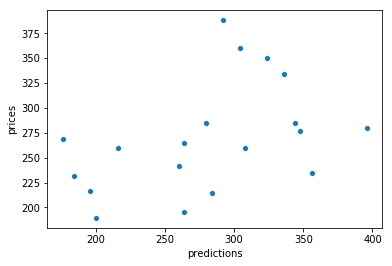

In [35]:
seaborn.scatterplot(x = "predictions", y = "prices", data=plotDF)